<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/process/allocationoilandgas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Setting up the Colab page to use neqsim
#@markdown <br><br>This document is part of the module ["Introduction to Gas Processing using NeqSim in Colab"](https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/examples_of_NeqSim_in_Colab.ipynb#scrollTo=_eRtkQnHpL70).
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *

# Litterature

Recommended guideline for allocation simulation

https://openarchive.usn.no/usn-xmlui/handle/11250/2765116

Production Allocation of Oil and Gas: A case Study:

https://ntnuopen.ntnu.no/ntnu-xmlui/handle/11250/2351061


Energy Institute

https://publishing.energyinst.org/topics/hydrocarbon-management/upstream-measurement/hm-96.-guidelines-for-the-allocation-of-fluid-streams-in-oil-and-gas-production

#Allocation of oil and gas

https://en.wikipedia.org/wiki/Allocation_(oil_and_gas)


In the petroleum industry, allocation refers to practices of breaking down measures of quantities of extracted hydrocarbons across various contributing sources. Allocation aids the attribution of ownerships of hydrocarbons as each contributing element to a commingled flow or to a storage of petroleum may have a unique ownership. Contributing sources in this context are typically producing petroleum wells delivering flows of petroleum or flows of natural gas to a commingled flow or storage.

The terms hydrocarbon accounting and allocation are sometimes used interchangeably. Hydrocarbon accounting has a wider scope, taking advantages of allocation results, it is the petroleum management process by which ownership of extracted hydrocarbons is determined and tracked from a point of sale or discharge back to the point of extraction. In this way, hydrocarbon accounting also covers inventory control, material balance, and practices to trace ownership of hydrocarbons being transported in a transportation system, e.g. through pipelines to customers distant from the production plant.

In an allocation problem, contributing sources are more widely natural gas streams, fluid flows or multiphase flows derived from formations or zones in a well, from wells, and from fields, unitised production entities or production facilities. In hydrocarbon accounting, quantities of extracted hydrocarbon can be further split by ownership, by "cost oil" or "profit oil" categories, and broken down to individual composition fraction types. Such components may be alkane hydrocarbons, boiling point fractions, and mole weight fractions.



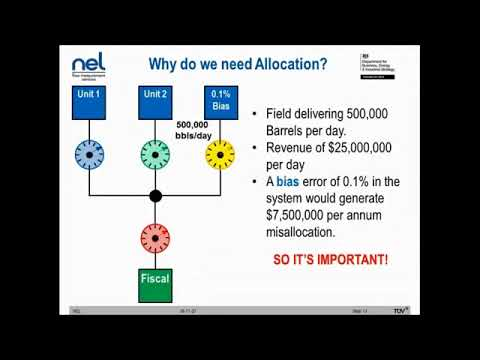

In [ ]:
#@title Introduction to Allocation
#@markdown This video gives an intriduction to allocation of oil and gas
from IPython.display import YouTubeVideo
YouTubeVideo('pdIzRGTgmco', width=600, height=400)

# Process simulation for allocation

In [2]:
inputdata = {
  'feedFlowRateWellA': 10,
  'wellPressure': 280.0,
  'wellTemperature':200.0,
  'topsidePressure': 90.0,
  'topsideTemperature': 5.0,
  'firstStagePressure': 75.0,
  'temperatureOilHeater' : 90.0,
  'secondStagePressure': 8.6,
  'thirdStagePressure': 1.9,
  'firstStageSuctionCoolerTemperature': 25.3,
  'secondStageSuctionCoolerTemperature': 24.5,
  'thirdStageSuctionCoolerTemperature':25.0,
  'firstStageExportCoolerTemperature': 25.3,
  'secondStageExportCoolerTemperature': 24.5
}

In [3]:
from neqsim.thermo import fluid, printFrame
from neqsim.process import compressor, cooler, separator3phase, getProcess, clearProcess, mixer, heater, stream, pump, separator, runProcess, stream, saturator, valve, filters, heatExchanger, simpleTEGAbsorber,distillationColumn, waterStripperColumn, recycle2, setpoint, calculator

clearProcess()

wellFluid = fluid('pr')
wellFluid.addComponent("nitrogen", 0.08)
wellFluid.addComponent("CO2", 3.56)
wellFluid.addComponent("methane", 87.36)
wellFluid.addComponent("ethane", 4.02)
wellFluid.addComponent("propane", 1.54)
wellFluid.addComponent("i-butane", 0.2)
wellFluid.addComponent("n-butane", 0.42)
wellFluid.addComponent("i-pentane", 0.15)
wellFluid.addComponent("n-pentane", 0.20)

wellFluid.addTBPfraction("C6", 3.24, 84.99/1000.0, 695.0/1000.0)
wellFluid.addTBPfraction("C7", 1.34, 97.87/1000.0, 718.0/1000.0)
wellFluid.addTBPfraction("C8", 1.33, 111.54/1000.0, 729.0/1000.0)
wellFluid.addTBPfraction("C9", 1.19, 126.1/1000.0, 749.0/1000.0)
wellFluid.addTBPfraction("C10", 1.15, 140.14/1000.0, 760.0/1000.0)
wellFluid.addTBPfraction("C11", 1.69, 175.0/1000.0, 830.0/1000.0)
wellFluid.addTBPfraction("C12", 1.5, 280.0/1000.0, 914.0/1000.0)
wellFluid.addTBPfraction("C13", 2.103, 560.0/1000.0, 980.0/1000.0)

wellFluid.setMixingRule('classic')

wellFluid.setMolarComposition([0.08, 3.56, 87.36, 4.02, 1.54, 0.2, 0.42, 0.15, 0.2, 1.24, 1.34, 1.33, 1.19, 1.15, 1.69, 1.5, 1.03])

wellStream = stream(wellFluid)
wellStream.setName("dry well stream")
wellStream.setFlowRate(inputdata['feedFlowRateWellA'], "MSm3/day")
wellStream.setTemperature(inputdata['wellTemperature'], "C")
wellStream.setPressure(inputdata['wellPressure'], "bara")

saturatedFeedGas = saturator(wellStream)
saturatedFeedGas.setName("water saturator")

waterSaturatedFeedGas = stream(saturatedFeedGas.getOutStream())
waterSaturatedFeedGas.setName("water saturated feed gas")

feedTPsetter = heater(waterSaturatedFeedGas)
feedTPsetter.setName('inletTP')
feedTPsetter.setOutPressure(inputdata['topsidePressure'], "bara")
feedTPsetter.setOutTemperature(inputdata['topsideTemperature'], "C")

chokeValve = valve(feedTPsetter.getOutStream())
chokeValve.setOutletPressure(inputdata['firstStagePressure'], 'bara')

feedToOffshoreProcess = stream(chokeValve.getOutStream())
feedToOffshoreProcess.setName("feed to offshore")

firstStageSeparator = separator3phase(feedToOffshoreProcess)
firstStageSeparator.setName("1st stage separator")

oilHeaterFromFirstStage = heater(firstStageSeparator.getOilOutStream())
oilHeaterFromFirstStage.setName("oil heater second stage")
oilHeaterFromFirstStage.setOutTemperature(inputdata['temperatureOilHeater'],'C')

oilThrotValve = valve(oilHeaterFromFirstStage.getOutStream())
oilThrotValve.setName("valve oil from first stage")
oilThrotValve.setOutletPressure(inputdata['secondStagePressure'])

secondStageSeparator = separator3phase(oilThrotValve.getOutStream())
secondStageSeparator.setName("2nd stage separator")

oilThrotValve2 = valve(secondStageSeparator.getOilOutStream())
oilThrotValve2.setName("valve oil from second stage")
oilThrotValve2.setOutletPressure(inputdata['thirdStagePressure'])

thirdStageSeparator = separator3phase(oilThrotValve2.getOutStream())
thirdStageSeparator.setName("3rd stage separator")

oilThirdStageToSep =  wellStream.clone()
oilThirdStageToSep.setName("resyc oil")
thirdStageSeparator.addStream(oilThirdStageToSep)

stableOil = stream(thirdStageSeparator.getOilOutStream())
stableOil.setName("stable oil")

stableOilPump = pump(stableOil,15.0,"stable oil pump")

firstStageCooler = cooler(thirdStageSeparator.getGasOutStream())
firstStageCooler.setName("1st stage cooler")
firstStageCooler.setOutTemperature(inputdata['firstStageSuctionCoolerTemperature'],'C')

firstStageScrubber = separator(firstStageCooler.getOutStream())
firstStageScrubber.setName("1st stage scrubber")

firstStageCompressor = compressor(firstStageScrubber.getGasOutStream())
firstStageCompressor.setName("1st stage compressor")
firstStageCompressor.setOutletPressure(inputdata['secondStagePressure'])
firstStageCompressor.setIsentropicEfficiency(0.75)

firststGasMixer = mixer("first Stage mixer")
firststGasMixer.addStream(firstStageCompressor.getOutStream())
firststGasMixer.addStream(secondStageSeparator.getGasOutStream())

secondStageCooler = cooler(firststGasMixer.getOutStream())
secondStageCooler.setName("2nd stage cooler")
secondStageCooler.setOutTemperature(inputdata['secondStageSuctionCoolerTemperature'],'C')

secondStageScrubber = separator(secondStageCooler.getOutStream())
secondStageScrubber.setName("2nd stage scrubber")

secondStageCompressor = compressor(secondStageScrubber.getGasOutStream())
secondStageCompressor.setName("2nd stage compressor")
secondStageCompressor.setOutletPressure(inputdata['firstStagePressure'])
secondStageCompressor.setIsentropicEfficiency(0.75)

richGasMixer = mixer("fourth Stage mixer")
richGasMixer.addStream(secondStageCompressor.getOutStream())
richGasMixer.addStream(firstStageSeparator.getGasOutStream())

dewPointControlCooler = cooler(richGasMixer.getOutStream())
dewPointControlCooler.setName("dew point cooler")
dewPointControlCooler.setOutTemperature(inputdata['thirdStageSuctionCoolerTemperature'],'C')

dewPointScrubber = separator(dewPointControlCooler.getOutStream())
dewPointScrubber.setName("dew point scrubber")

lpLiqmixer = mixer("LP liq gas mixer");
lpLiqmixer.addStream(firstStageScrubber.getLiquidOutStream());
lpLiqmixer.addStream(secondStageScrubber.getLiquidOutStream());
lpLiqmixer.addStream(dewPointScrubber.getLiquidOutStream());

lpResycle = recycle2("LP liq resycle")
lpResycle.addStream(lpLiqmixer.getOutStream())
lpResycle.setOutletStream(oilThirdStageToSep)

exportCompressor1 = compressor(dewPointScrubber.getGasOutStream())
exportCompressor1.setName("export 1st stage")
exportCompressor1.setOutletPressure(140.0)
exportCompressor1.setIsentropicEfficiency(0.75)

exportInterstageCooler = cooler(exportCompressor1.getOutStream())
exportInterstageCooler.setName("interstage stage cooler")
exportInterstageCooler.setOutTemperature(inputdata['firstStageExportCoolerTemperature'],'C')

exportCompressor2= compressor(exportInterstageCooler.getOutStream())
exportCompressor2.setName("export 2nd stage")
exportCompressor2.setOutletPressure(200.0)
exportCompressor2.setIsentropicEfficiency(0.75)

exportCooler = cooler(exportCompressor1.getOutStream())
exportCooler.setName("export cooler")
exportCooler.setOutTemperature(inputdata['secondStageExportCoolerTemperature'],'C')

exportGas = stream(exportCooler.getOutStream())
exportGas.setName("export gas")

oilprocess = getProcess()

In [4]:
oilprocess.run()

In [5]:
TVP = stableOil.TVP(35.0, 'C')
cricondenbar = exportGas.CCB('bara')
gasexport = exportGas.getFlowRate('MSm3/day')
oilexport = stableOil.getFlowRate('m3/hr')

print('TVP [bara] ', TVP)
print('cricondenbar [bara] ', cricondenbar)
print('gas export [MSm3/day] ', gasexport)
print('oil export [m3/hr] ', oilexport)

TVP [bara]  1.028165025502015
cricondenbar [bara]  92.66412118894812
gas export [MSm3/day]  8.994078680788618
oil export [m3/hr]  402.76044005769796


#ORF factors
In the following code the ORF factors are calculated

In [6]:
componentNames = wellStream.getFluid().getComponentNames()

print ('ORF.......................')
for name in componentNames:
  total = wellStream.getFluid().getComponent(name).getTotalFlowRate('kg/hr')
  ORF = stableOil.getFluid().getComponent(name).getTotalFlowRate('kg/hr')/total
  print('ORF ', name, ' ', ORF)


ORF.......................
ORF  nitrogen   1.541524999585762e-05
ORF  CO2   0.0024259122327606134
ORF  methane   0.0003081889757407152
ORF  ethane   0.011656830297915524
ORF  propane   0.08801125039424636
ORF  i-butane   0.23910184802401435
ORF  n-butane   0.3347767744694241
ORF  i-pentane   0.5905448043206002
ORF  n-pentane   0.6666430995186312
ORF  C6_PC   0.8931914994634796
ORF  C7_PC   0.9614799212683558
ORF  C8_PC   0.9858115246258417
ORF  C9_PC   0.9946177064307067
ORF  C10_PC   0.9976832119015387
ORF  C11_PC   0.9997382346895108
ORF  C12_PC   0.999999692021874
ORF  C13_PC   0.999999999999771


# Adding a new well stream
In the following example we will add a new well stream and add it to the inlet separator.

In [7]:
inputdata2 = {
  'feedFlowRateWellB': 5,
  'wellPressure': 280.0,
  'wellTemperature':200.0
}

In [8]:
wellFluid2 = fluid('pr')
wellFluid2.addComponent("nitrogen", 0.08)
wellFluid2.addComponent("CO2", 3.56)
wellFluid2.addComponent("methane", 87.36)
wellFluid2.addComponent("ethane", 4.02)
wellFluid2.addComponent("propane", 1.54)
wellFluid2.addComponent("i-butane", 0.2)
wellFluid2.addComponent("n-butane", 0.42)
wellFluid2.addComponent("i-pentane", 0.15)
wellFluid2.addComponent("n-pentane", 0.20)

wellFluid2.addTBPfraction("C6", 3.24, 84.99/1000.0, 695.0/1000.0)
wellFluid2.addTBPfraction("C7", 1.34, 97.87/1000.0, 718.0/1000.0)
wellFluid2.addTBPfraction("C8", 1.33, 111.54/1000.0, 729.0/1000.0)
wellFluid2.addTBPfraction("C9", 1.19, 126.1/1000.0, 749.0/1000.0)
wellFluid2.addTBPfraction("C10", 1.15, 140.14/1000.0, 760.0/1000.0)
wellFluid2.addTBPfraction("C11", 1.69, 175.0/1000.0, 830.0/1000.0)
wellFluid2.addTBPfraction("C12", 1.5, 280.0/1000.0, 914.0/1000.0)
wellFluid2.addTBPfraction("C13", 2.103, 560.0/1000.0, 980.0/1000.0)

wellFluid2.setMixingRule(2)
wellFluid2.init(0)

wellFluid2.setMolarComposition([0.08, 3.56, 45.36, 4.02, 1.54, 0.2, 0.42, 0.15, 0.2, 1.24, 1.34, 1.33, 1.19, 2.15, 2.69, 3.5, 1.03])

wellStream2 = stream(wellFluid2)
wellStream2.setName("dry well stream 2")
wellStream2.setFlowRate(inputdata2['feedFlowRateWellB'], "MSm3/day")
wellStream2.setTemperature(inputdata2['wellTemperature'], "C")
wellStream2.setPressure(inputdata2['wellPressure'], "bara")


saturatedFeedGas2 = saturator(wellStream2)
saturatedFeedGas2.setName("water saturator 2")

waterSaturatedFeedGas2 = stream(saturatedFeedGas2.getOutStream())
waterSaturatedFeedGas2.setName("water saturated feed gas 2")

feedTPsetter2 = heater(waterSaturatedFeedGas2)
feedTPsetter2.setName('inletTP')
feedTPsetter2.setOutPressure(inputdata['topsidePressure'], "bara")
feedTPsetter2.setOutTemperature(inputdata['topsideTemperature'], "C")

firstStageSeparator.addStream(feedTPsetter2.getOutStream())

In [9]:
# wellStream.setFlowRate(1.0e-6, 'kg/hr')  #uncomment it you new well to be run alone
oilprocess.run()

In [10]:
TVP = stableOil.TVP(20.0, 'C')
cricondenbar = exportGas.CCB('bara')
gasexport = exportGas.getFlowRate('MSm3/day')
oilexport = stableOil.getFlowRate('m3/hr')

print('TVP [bara] ', TVP)
print('cricondenbar [bara] ', cricondenbar)
print('gas export [MSm3/day] ', gasexport)
print('oil export [m3/hr] ', oilexport)

TVP [bara]  0.8464349442297588
cricondenbar [bara]  93.58635968307529
gas export [MSm3/day]  12.919770533021055
oil export [m3/hr]  847.1387058077279


In [11]:
componentNames = wellStream.getFluid().getComponentNames()

print ('ORF.......................')
for name in componentNames:
  total = wellStream.getFluid().getComponent(name).getTotalFlowRate('kg/hr')+wellStream2.getFluid().getComponent(name).getTotalFlowRate('kg/hr')
  ORF = stableOil.getFluid().getComponent(name).getTotalFlowRate('kg/hr')/total
  print('ORF ', name, ' ', ORF)

ORF.......................
ORF  nitrogen   2.3676414190135438e-05
ORF  CO2   0.003361582600537279
ORF  methane   0.0004543497183912139
ORF  ethane   0.015329349940262011
ORF  propane   0.102879063600216
ORF  i-butane   0.26086641156753676
ORF  n-butane   0.3548025974598253
ORF  i-pentane   0.6035480097417469
ORF  n-pentane   0.676011038561422
ORF  C6_PC   0.8975161417887895
ORF  C7_PC   0.965437191909732
ORF  C8_PC   0.9885474059947272
ORF  C9_PC   0.9960433748087433
ORF  C10_PC   0.9983785176326525
ORF  C11_PC   0.9998216085118513
ORF  C12_PC   0.9999997840894307
ORF  C13_PC   0.999999999999881


In [13]:
#Calculation of K-factors
componentNames = wellStream.getFluid().getComponentNames()

print ('K.......................')
for name in componentNames:
  K = exportGas.getFluid().getComponent(name).getz()/stableOil.getFluid().getComponent(name).getz()
  print('K ', name, ' ', K)

K.......................
K  nitrogen   6815.033834434325
K  CO2   47.83899426180071
K  methane   354.9822200047777
K  ethane   10.364813496497595
K  propane   1.4070783760198804
K  i-butane   0.4571927329581886
K  n-butane   0.29342737258544377
K  i-pentane   0.10599243628578187
K  n-pentane   0.07733447846315625
K  C6_PC   0.018425220131899834
K  C7_PC   0.005776760252916529
K  C8_PC   0.0018694120678679643
K  C9_PC   0.0006409804299072824
K  C10_PC   0.00026206837278962806
K  C11_PC   2.879043117161319e-05
K  C12_PC   3.4838941125697826e-08
K  C13_PC   2.7162097250529046e-15


# Comment
As we can see the ORF of the light components like eg. propane are now a bit higher. This is due to more of the lighter components are extracted in the oil of the more oil dominated new well.

## Tracking induvidual components from wells

In [ ]:
wellFluid = fluid('pr')
wellFluid.addComponent("nitrogen", 0.08)
wellFluid.addComponent("CO2", 3.56)
wellFluid.addComponent("methane", 87.36)
wellFluid.addComponent("ethane", 4.02)
wellFluid.addComponent("propane", 1.54)
wellFluid.addComponent("i-butane", 0.2)
wellFluid.addComponent("n-butane", 0.42)
wellFluid.addComponent("i-pentane", 0.15)
wellFluid.addComponent("n-pentane", 0.20)

wellFluid.addTBPfraction("C6", 3.24, 84.99/1000.0, 695.0/1000.0)
wellFluid.addTBPfraction("C7", 1.34, 97.87/1000.0, 718.0/1000.0)
wellFluid.addTBPfraction("C8", 1.33, 111.54/1000.0, 729.0/1000.0)
wellFluid.addTBPfraction("C9", 1.19, 126.1/1000.0, 749.0/1000.0)
wellFluid.addTBPfraction("C10", 1.15, 140.14/1000.0, 760.0/1000.0)
wellFluid.addTBPfraction("C11", 1.69, 175.0/1000.0, 830.0/1000.0)
wellFluid.addTBPfraction("C12", 1.5, 280.0/1000.0, 914.0/1000.0)
wellFluid.addTBPfraction("C13", 2.103, 560.0/1000.0, 980.0/1000.0)

names = wellFluid.getComponentNames()

for i in range(names.length):
  wellFluid.changeComponentName(wellFluid.getComponent(i).getName(), (wellFluid.getComponent(i).getName()+"_well1"))

wellFluid.addComponent("nitrogen", 0.08)
wellFluid.addComponent("CO2", 3.56)
wellFluid.addComponent("methane", 87.36)
wellFluid.addComponent("ethane", 4.02)
wellFluid.addComponent("propane", 1.54)
wellFluid.addComponent("i-butane", 0.2)
wellFluid.addComponent("n-butane", 0.42)
wellFluid.addComponent("i-pentane", 0.15)
wellFluid.addComponent("n-pentane", 0.20)

wellFluid.addTBPfraction("C6", 3.24, 82.99/1000.0, 695.0/1000.0)
wellFluid.addTBPfraction("C7", 1.34, 95.87/1000.0, 718.0/1000.0)
wellFluid.addTBPfraction("C8", 1.33, 121.54/1000.0, 729.0/1000.0)
wellFluid.addTBPfraction("C9", 1.19, 136.1/1000.0, 749.0/1000.0)
wellFluid.addTBPfraction("C10", 1.15, 150.14/1000.0, 760.0/1000.0)
wellFluid.addTBPfraction("C11", 1.69, 175.0/1000.0, 830.0/1000.0)
wellFluid.addTBPfraction("C12", 1.5, 310.0/1000.0, 914.0/1000.0)
wellFluid.addTBPfraction("C13", 2.103, 520.0/1000.0, 980.0/1000.0)

for i in range(names.length):
  wellFluid.changeComponentName(names[i], (wellFluid.getComponent(i).getName().replace("well1", "well2")))

wellFluid.setMixingRule('classic')

printFrame(wellFluid)


#and then set the fluid composition of the wells and run simulation

from neqsim.thermo import fluid, printFrame
from neqsim.process import compressor, cooler, separator3phase, getProcess, clearProcess, mixer, heater, stream, pump, separator, runProcess, stream, saturator, valve, filters, heatExchanger, simpleTEGAbsorber,distillationColumn, waterStripperColumn, recycle2, setpoint, calculator

wellFluid.setMolarComposition([0.08, 3.56, 87.36, 4.02, 1.54, 0.2, 0.42, 0.15, 0.2, 1.24, 1.34, 1.33, 1.19, 1.15, 1.69, 1.5, 1.03,
                               0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])


welFluid2 = wellFluid.clone()
welFluid2.setMolarComposition([ 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
                               1.08, 3.56, 45.36, 2.02, 7.54, 5.2, 0.42, 0.15, 0.2, 1.24, 1.34, 1.33, 1.19, 1.15, 1.69, 1.5, 1.03])

clearProcess()

wellStream = stream(wellFluid)
wellStream.setName("dry well stream")
wellStream.setFlowRate(inputdata['feedFlowRateWellA'], "MSm3/day")
wellStream.setTemperature(inputdata['wellTemperature'], "C")
wellStream.setPressure(inputdata['wellPressure'], "bara")

wellStream2 = stream(welFluid2)
wellStream2.setName("dry well stream2")
wellStream2.setFlowRate(inputdata2['feedFlowRateWellB'], "MSm3/day")
wellStream2.setTemperature(inputdata2['wellTemperature'], "C")
wellStream2.setPressure(inputdata2['wellPressure'], "bara")

wellmixer = mixer('mixer')
wellmixer.addStream(wellStream)
wellmixer.addStream(wellStream2)

feedTPsetter = heater(wellmixer.getOutletStream())
feedTPsetter.setName('inletTP')
feedTPsetter.setOutPressure(inputdata['topsidePressure'], "bara")
feedTPsetter.setOutTemperature(inputdata['topsideTemperature'], "C")

chokeValve = valve(feedTPsetter.getOutStream())
chokeValve.setOutletPressure(inputdata['firstStagePressure'], 'bara')

feedToOffshoreProcess = stream(chokeValve.getOutStream())
feedToOffshoreProcess.setName("feed to offshore")

firstStageSeparator = separator3phase(feedToOffshoreProcess)
firstStageSeparator.setName("1st stage separator")

oilHeaterFromFirstStage = heater(firstStageSeparator.getOilOutStream())
oilHeaterFromFirstStage.setName("oil heater second stage")
oilHeaterFromFirstStage.setOutTemperature(inputdata['temperatureOilHeater'],'C')

oilThrotValve = valve(oilHeaterFromFirstStage.getOutStream())
oilThrotValve.setName("valve oil from first stage")
oilThrotValve.setOutletPressure(inputdata['secondStagePressure'])

secondStageSeparator = separator3phase(oilThrotValve.getOutStream())
secondStageSeparator.setName("2nd stage separator")

oilThrotValve2 = valve(secondStageSeparator.getOilOutStream())
oilThrotValve2.setName("valve oil from second stage")
oilThrotValve2.setOutletPressure(inputdata['thirdStagePressure'])

thirdStageSeparator = separator3phase(oilThrotValve2.getOutStream())
thirdStageSeparator.setName("3rd stage separator")

oilThirdStageToSep =  wellStream.clone()
oilThirdStageToSep.setName("resyc oil")
thirdStageSeparator.addStream(oilThirdStageToSep)

stableOil = stream(thirdStageSeparator.getOilOutStream())
stableOil.setName("stable oil")

stableOilPump = pump(stableOil,15.0,"stable oil pump")

firstStageCooler = cooler(thirdStageSeparator.getGasOutStream())
firstStageCooler.setName("1st stage cooler")
firstStageCooler.setOutTemperature(inputdata['firstStageSuctionCoolerTemperature'],'C')

firstStageScrubber = separator(firstStageCooler.getOutStream())
firstStageScrubber.setName("1st stage scrubber")

firstStageCompressor = compressor(firstStageScrubber.getGasOutStream())
firstStageCompressor.setName("1st stage compressor")
firstStageCompressor.setOutletPressure(inputdata['secondStagePressure'])
firstStageCompressor.setIsentropicEfficiency(0.75)

firststGasMixer = mixer("first Stage mixer")
firststGasMixer.addStream(firstStageCompressor.getOutStream())
firststGasMixer.addStream(secondStageSeparator.getGasOutStream())

secondStageCooler = cooler(firststGasMixer.getOutStream())
secondStageCooler.setName("2nd stage cooler")
secondStageCooler.setOutTemperature(inputdata['secondStageSuctionCoolerTemperature'],'C')

secondStageScrubber = separator(secondStageCooler.getOutStream())
secondStageScrubber.setName("2nd stage scrubber")

secondStageCompressor = compressor(secondStageScrubber.getGasOutStream())
secondStageCompressor.setName("2nd stage compressor")
secondStageCompressor.setOutletPressure(inputdata['firstStagePressure'])
secondStageCompressor.setIsentropicEfficiency(0.75)

richGasMixer = mixer("fourth Stage mixer")
richGasMixer.addStream(secondStageCompressor.getOutStream())
richGasMixer.addStream(firstStageSeparator.getGasOutStream())

dewPointControlCooler = cooler(richGasMixer.getOutStream())
dewPointControlCooler.setName("dew point cooler")
dewPointControlCooler.setOutTemperature(inputdata['thirdStageSuctionCoolerTemperature'],'C')

dewPointScrubber = separator(dewPointControlCooler.getOutStream())
dewPointScrubber.setName("dew point scrubber")

lpLiqmixer = mixer("LP liq gas mixer");
lpLiqmixer.addStream(firstStageScrubber.getLiquidOutStream());
lpLiqmixer.addStream(secondStageScrubber.getLiquidOutStream());
lpLiqmixer.addStream(dewPointScrubber.getLiquidOutStream());

lpResycle = recycle2("LP liq resycle")
lpResycle.addStream(lpLiqmixer.getOutStream())
lpResycle.setOutletStream(oilThirdStageToSep)

exportCompressor1 = compressor(dewPointScrubber.getGasOutStream())
exportCompressor1.setName("export 1st stage")
exportCompressor1.setOutletPressure(140.0)
exportCompressor1.setIsentropicEfficiency(0.75)

exportInterstageCooler = cooler(exportCompressor1.getOutStream())
exportInterstageCooler.setName("interstage stage cooler")
exportInterstageCooler.setOutTemperature(inputdata['firstStageExportCoolerTemperature'],'C')

exportCompressor2= compressor(exportInterstageCooler.getOutStream())
exportCompressor2.setName("export 2nd stage")
exportCompressor2.setOutletPressure(200.0)
exportCompressor2.setIsentropicEfficiency(0.75)

exportCooler = cooler(exportCompressor1.getOutStream())
exportCooler.setName("export cooler")
exportCooler.setOutTemperature(inputdata['secondStageExportCoolerTemperature'],'C')

exportGas = stream(exportCooler.getOutStream())
exportGas.setName("export gas")

oilprocess = getProcess()

| 0                  | 1          | 2          | 3          | 4   | 5   | 6               |
|:-------------------|:-----------|:-----------|:-----------|:----|:----|:----------------|
|                    | total      | GAS        | OIL        |     |     |                 |
| nitrogen_well1     | 3.60124E-4 | 3.60124E-4 | 3.60124E-4 |     |     | [mole fraction] |
| CO2_well1          | 1.60255E-2 | 1.60255E-2 | 1.60255E-2 |     |     | [mole fraction] |
| methane_well1      | 3.93255E-1 | 3.93255E-1 | 3.93255E-1 |     |     | [mole fraction] |
| ethane_well1       | 1.80962E-2 | 1.80962E-2 | 1.80962E-2 |     |     | [mole fraction] |
| propane_well1      | 6.93238E-3 | 6.93238E-3 | 6.93238E-3 |     |     | [mole fraction] |
| i-butane_well1     | 9.00309E-4 | 9.00309E-4 | 9.00309E-4 |     |     | [mole fraction] |
| n-butane_well1     | 1.89065E-3 | 1.89065E-3 | 1.89065E-3 |     |     | [mole fraction] |
| i-pentane_well1    | 6.75232E-4 | 6.75232E-4 | 6.75232E-4 |     |     | [mole 

In [ ]:
oilprocess.run()

In [ ]:
TVP = stableOil.TVP(20.0, 'C')
cricondenbar = exportGas.CCB('bara')
gasexport = exportGas.getFlowRate('MSm3/day')
oilexport = stableOil.getFlowRate('m3/hr')

print('TVP [bara] ', TVP)
print('cricondenbar [bara] ', cricondenbar)
print('gas export [MSm3/day] ', gasexport)
print('oil export [m3/hr] ', oilexport)

TVP [bara]  0.9605156429147605
cricondenbar [bara]  99.0855881653341
gas export [MSm3/day]  13.15414203954231
oil export [m3/hr]  706.5275267401072


In [ ]:
printFrame(exportGas.getFluid())

| 0                  | 1           | 2           | 3   | 4   | 5   | 6               |
|:-------------------|:------------|:------------|:----|:----|:----|:----------------|
|                    | total       | GAS         |     |     |     |                 |
| nitrogen_well1     | 5.63112E-4  | 5.63112E-4  |     |     |     | [mole fraction] |
| CO2_well1          | 2.48829E-2  | 2.48829E-2  |     |     |     | [mole fraction] |
| methane_well1      | 6.14759E-1  | 6.14759E-1  |     |     |     | [mole fraction] |
| ethane_well1       | 2.79559E-2  | 2.79559E-2  |     |     |     | [mole fraction] |
| propane_well1      | 9.82525E-3  | 9.82525E-3  |     |     |     | [mole fraction] |
| i-butane_well1     | 1.05409E-3  | 1.05409E-3  |     |     |     | [mole fraction] |
| n-butane_well1     | 1.93175E-3  | 1.93175E-3  |     |     |     | [mole fraction] |
| i-pentane_well1    | 4.27495E-4  | 4.27495E-4  |     |     |     | [mole fraction] |
| n-pentane_well1    | 4.68361E-4  | 4.6836

calculation of ORF factors for the induvidual components from well 1 and 2.

In [ ]:
componentNames = wellStream.getFluid().getComponentNames()

print ('ORF factors.......................')
for name in componentNames:
  total = wellStream.getFluid().getComponent(name).getTotalFlowRate('kg/hr') + wellStream2.getFluid().getComponent(name).getTotalFlowRate('kg/hr')
  ORF = stableOil.getFluid().getComponent(name).getTotalFlowRate('kg/hr')/total
  print('ORF ', name, ' ', ORF)

ORF factors.......................
ORF  nitrogen_well1   2.0189379446066245e-05
ORF  CO2_well1   0.007028119748784879
ORF  methane_well1   0.00027928087858549084
ORF  ethane_well1   0.012051854358947362
ORF  propane_well1   0.09361799612549128
ORF  i-butane_well1   0.2512436747574284
ORF  n-butane_well1   0.34656942898608445
ORF  i-pentane_well1   0.59508784535553
ORF  n-pentane_well1   0.6672771298805253
ORF  C6_PC_well1   0.8908415058753164
ORF  C7_PC_well1   0.96277064833508
ORF  C8_PC_well1   0.9879750844882502
ORF  C9_PC_well1   0.9959097330620179
ORF  C10_PC_well1   0.9983095170240023
ORF  C11_PC_well1   0.9998042856888982
ORF  C12_PC_well1   0.9999997240196382
ORF  C13_PC_well1   0.9999999999999686
ORF  nitrogen_well2   2.018937944269106e-05
ORF  CO2_well2   0.0070281196114597815
ORF  methane_well2   0.0002792808782156997
ORF  ethane_well2   0.012051853937646982
ORF  propane_well2   0.09361797288092685
ORF  i-butane_well2   0.2512434901363216
ORF  n-butane_well2   0.346569069765

In [ ]:
#calculation of flow of wellstream 1 in oil and gas export

componentNames = wellStream.getFluid().getComponentNames()

totalGasFlowFromWell1 = 0
totalOilFlowFromWell1 = 0
for name in componentNames:
  if(wellStream.getFluid().getComponent(name).getz()>0):
    totalGasFlowFromWell1 = totalGasFlowFromWell1 + exportGas.getFluid().getComponent(name).getFlowRate('kg/hr')
    totalOilFlowFromWell1 = totalOilFlowFromWell1 + stableOil.getFluid().getComponent(name).getFlowRate('kg/hr')

print('well stream 1 flow ' , wellStream.getFlowRate('kg/hr'), ' kg/hr')
print('well stream 1 in export gas ', totalGasFlowFromWell1, ' kg/hr')
print('well stream 1 in stable oil ', totalOilFlowFromWell1, ' kg/hr')


well stream 1 flow  619893.2766954034  kg/hr
well stream 1 in export gas  292533.8459090735  kg/hr
well stream 1 in stable oil  327358.37782692607  kg/hr


Evaluating effect of production rate of well 1 for well 2 gas/oil export allocation

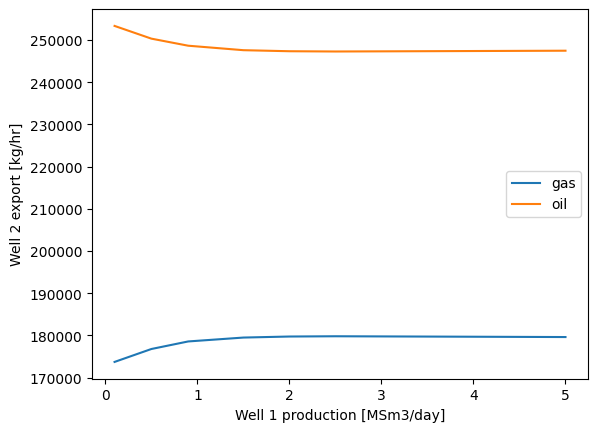

In [ ]:
import matplotlib.pyplot as plt

well1production = [0.1, 0.5, 0.9, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
well2Gas = []
well2Oil = []

#set flow from well 2
oilprocess.getUnit('dry well stream2').setFlowRate(5.0, "MSm3/day")

for production in well1production:
  oilprocess.getUnit('dry well stream').setFlowRate(production, "MSm3/day")
  oilprocess.run()

  totalGasFlowFromWell2 = 0
  totalOilFlowFromWell2 = 0
  for name in componentNames:
    if(wellStream2.getFluid().getComponent(name).getz()>0):
      totalGasFlowFromWell2 = totalGasFlowFromWell2 + exportGas.getFluid().getComponent(name).getFlowRate('kg/hr')
      totalOilFlowFromWell2 = totalOilFlowFromWell2 + stableOil.getFluid().getComponent(name).getFlowRate('kg/hr')
  well2Gas.append(totalGasFlowFromWell2)
  well2Oil.append(totalOilFlowFromWell2)

plt.figure()
plt.xlabel('Well 1 production [MSm3/day]')
plt.ylabel('Well 2 export [kg/hr]')
plt.plot(well1production, well2Gas)
plt.plot(well1production, well2Oil)
plt.legend(['gas', 'oil'])

We see that when increasing the production of a well with high GOR (well 1), the the allocated oil production for the low GOR well (well 2) will decrease while gas allocation will increase.

A similar analysis could be done to see how different wells influence process capacity, power consumption and emissions for a field.